In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
import csv
from datetime import datetime

In [2]:
current_date = str(datetime.date(datetime.now()))
image_filename = "img/" + current_date + ".png"

In [3]:
# open the dataset
with open('OntarioCoronavirus.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))

In [4]:
# get only the cases and days columns without the header
cases_col_name = "Ontario Cases"
days_col_name = "Days since start"
cases_col_num = cases[0].index(cases_col_name)
days_col_num = cases[0].index(days_col_name)
cases = cases[1:]
cases = [[int(case[cases_col_num]), int(case[days_col_num])] for case in cases]
print(cases[:3])

[[1, 0], [2, 2], [3, 6]]


In [5]:
# convert to np
cases_array = np.array(cases[3:], dtype=np.float)
x = cases_array[:,1]
y = cases_array[:,0]

In [6]:
# fit exponential
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(exponential, x, y, p0=[0,0,0])
residuals = y - exponential(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9923611221285498


In [7]:
# fit logistic
def logistic(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

l_popt, l_pcov = curve_fit(logistic, x, y, p0=[0,0,0])
l_residuals = y - logistic(x, *l_popt)
l_ss_res = np.sum(l_residuals**2)
l_ss_tot = np.sum((y-np.mean(y))**2)
l_r_squared = 1 - (l_ss_res / l_ss_tot)
print(l_r_squared)
print(l_popt)

0.9928193756436413
[1.81649070e+03 2.05109906e-01 6.25744351e+01]


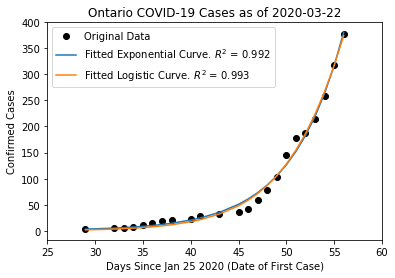

In [8]:
# create plot
plt.figure()
plt.plot(x, y, 'ko', 
         label="Original Data")

# plot exponential curve
plt.plot(x, exponential(x, *popt), 
         label="Fitted Exponential Curve. $R^2$ = {:.3f}"
         .format(r_squared))

# plot logistic curve
plt.plot(cases_array[:,1], logistic(cases_array[:,1], *l_popt), 
         label="Fitted Logistic Curve. $R^2$ = {:.3f}"
         .format(l_r_squared))

# create labels and ticks
plt.legend()
plt.title("Ontario COVID-19 Cases as of " + current_date)
plt.ylabel("Confirmed Cases")
plt.xlabel("Days Since Jan 25 2020 (Date of First Case)")
xticks = np.array([i * 5 for i in range(math.ceil(max(x) / 5) + 1) if i >= 5])
plt.xticks(xticks, xticks)

# save plot above to a file named after the current date
plt.savefig(image_filename)

# display plot
plt.show()

In [9]:
# predict number of cases for the next day
dates_with_tomorrow = np.append(x, max(x)+1)
exponential_prediction = exponential(dates_with_tomorrow, *popt)[-1]
logistic_prediction = logistic(dates_with_tomorrow, *l_popt)[-1]
prediction_text = ("Exponential prediction for the next day: {:.0f} confirmed cases"
                   .format(round(exponential_prediction)))
l_prediction_text = ("Logistic prediction for the next day: {:.0f} confirmed cases"
                     .format(round(logistic_prediction)))
print(prediction_text)
print(l_prediction_text)

Exponential prediction for the next day: 457 confirmed cases
Logistic prediction for the next day: 439 confirmed cases


In [10]:
# create readme
with open('readme_text/intro.md', 'r') as f:
    text = f.read()

text = text + "\n## Graph\n"
text = text + "![Graph of Ontario COVID-19 Cases](https://github.com/deanhuiwang/ontario-coronavirus/blob/master/img/" + current_date + ".png)\n\n"
text = text + "## Prediction\n"
text = text + prediction_text + "\n\n"
text = text + l_prediction_text + "\n"
    
with open('README.md', 'w') as f:
    f.write(text)